In [1]:
# Preprocessing Script for 'healthcare-dataset-stroke-data.csv'

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns




In [3]:
# Load the dataset
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

# Display first few rows
print("Initial Data Preview:")
print(df.head())


Initial Data Preview:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  



Missing Values:
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


<ipython-input-4-db0f04df68cd>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)


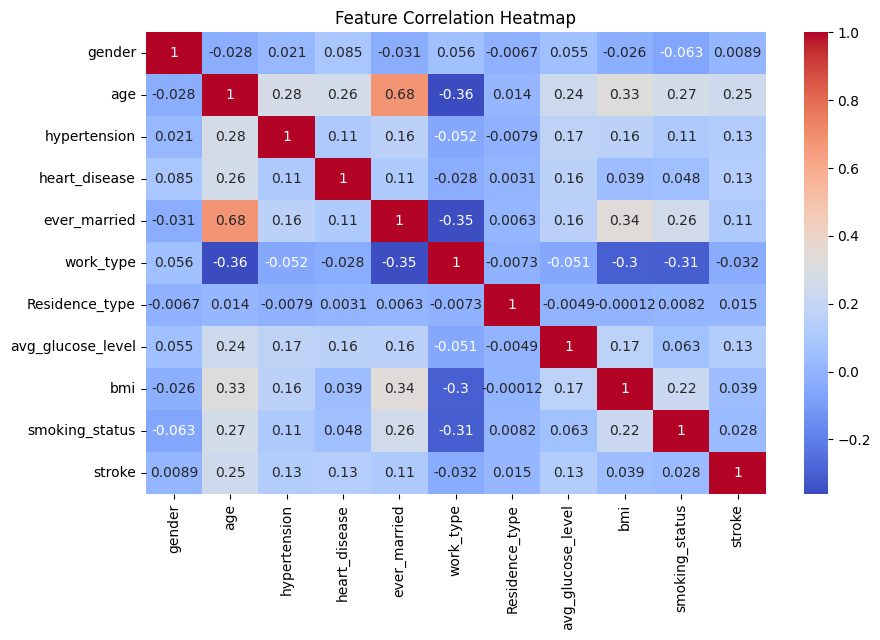

In [4]:

# Drop irrelevant columns (like ID)
df.drop(columns=['id'], inplace=True)

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Fill or drop missing values (e.g., BMI)
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# Encode categorical features
le = LabelEncoder()
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Normalize numerical columns
scaler = StandardScaler()
numerical_cols = ['age', 'avg_glucose_level', 'bmi']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Show correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()



In [5]:
# Save preprocessed dataset
df.to_csv("preprocessed_stroke_data.csv", index=False)
print("\n✅ Preprocessing complete. File saved as 'preprocessed_stroke_data.csv'")


✅ Preprocessing complete. File saved as 'preprocessed_stroke_data.csv'
